<a href="https://colab.research.google.com/github/shreya139/MiningMavericks/blob/Dhruvi-Kotecha/202218009_Data_Mining_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. About Dataset**
## **2010 New York State Hospital Inpatient Discharge Data**
### Detailed Characteristics, Diagnoses, Treatments and Payments
### By Health Data New York

In [102]:
# reading the csv file
discharge_data = pd.read_csv('/content/drive/MyDrive/Data_Mining_Datasets/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')

<ipython-input-102-8bcf434169e4>:2: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  discharge_data = pd.read_csv('/content/drive/MyDrive/Data_Mining_Datasets/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')


In [103]:
# copying discharge data to another dataset
data = discharge_data

## **Understanding the shape and columns of the dataset**

In [4]:
# there are 2622133 rows and 38 columns
data.shape

(2622133, 38)

In [5]:
# checking all the column names
data.columns

Index(['index', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [6]:
# describing information like datatypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [7]:
# checking the null values in all the columns
data.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [8]:
# calculating the percentage of missig values
missing_percentage = (data.isnull().sum() / len(data)) * 100

In [9]:
# checking the percentage of null values in all the columns
print(round(missing_percentage, 2))

index                                   0.00
Health Service Area                     0.19
Hospital County                         0.19
Operating Certificate Number            0.19
Facility ID                             0.19
Facility Name                           0.00
Age Group                               0.00
Zip Code - 3 digits                     0.12
Gender                                  0.00
Race                                    0.00
Ethnicity                               0.00
Length of Stay                          0.00
Type of Admission                       0.00
Patient Disposition                     0.00
Discharge Year                          0.00
CCS Diagnosis Code                      0.09
CCS Diagnosis Description               0.09
CCS Procedure Code                      0.09
CCS Procedure Description               0.09
APR DRG Code                            0.00
APR DRG Description                     0.00
APR MDC Code                            0.00
APR MDC De

In [10]:
# checking if there are any duplicate records in the dataset
data.duplicated().sum()

0

In [11]:
# viewing first 5 rows of the data
data.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [12]:
# summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2622133.0,1.311066e+06,7.569447e+05,0.00,655533.00,1311066.00,1966599.00,2622132.00
Operating Certificate Number,2617246.0,5.019051e+06,2.249577e+06,101000.00,2951001.00,5907002.00,7002002.00,7004010.00
Facility ID,2617246.0,1.036953e+03,6.448892e+02,1.00,541.00,1117.00,1450.00,9059.00
Discharge Year,2622133.0,2.010000e+03,0.000000e+00,2010.00,2010.00,2010.00,2010.00,2010.00
CCS Diagnosis Code,2619860.0,1.919431e+02,1.565932e+02,1.00,106.00,157.00,218.00,670.00
CCS Procedure Code,2619860.0,1.121324e+02,8.761224e+01,0.00,0.00,124.00,211.00,231.00
APR DRG Code,2622133.0,4.069629e+02,2.404910e+02,1.00,198.00,361.00,640.00,956.00
APR MDC Code,2622133.0,1.016206e+01,5.923678e+00,0.00,5.00,8.00,15.00,25.00
APR Severity of Illness Code,2622133.0,1.948373e+00,8.986120e-01,0.00,1.00,2.00,3.00,4.00
Attending Provider License Number,2617246.0,1.266323e+06,8.226220e+06,1.00,166659.00,205362.00,233561.00,90999999.00


In [13]:
# summary of the dataset including columns of object type
data.describe(include='object').T

,count,unique,top,freq
Health Service Area,2617246,8,New York City,1233121
Hospital County,2617246,57,Manhattan,445288
Facility Name,2622133,225,Mount Sinai Hospital,58696
Age Group,2622133,5,70 or Older,725253
Zip Code - 3 digits,2618932,78,112,236696
Gender,2622133,3,F,1477671
Race,2622133,4,White,1601378
Ethnicity,2622133,3,Not Span/Hispanic,2116780
Length of Stay,2622133,222,2,563044
Type of Admission,2622133,6,Emergency,1628999


# **3. Exploratory Data Analysis**

## **Univariate Analysis**

In [15]:
# Function to create boxplot and histogram for any input numerical variable.
# This function takes numerical columns as input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10)):
    f2, (ax_box2, ax_hist2) = plt.subplots(
                nrows = 2,
                gridspec_kw = {"height_ratios":(.25, .75)},
                figsize = figsize
                )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')
    sns.distplot(feature, ax=ax_hist2, color='tab:cyan', kde_kws={'color': 'tab:orange'})
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [75]:
def plot_categorical_with_percentage(data, col):
    plt.figure(figsize=(15, 6))

    # Check the number of unique categories in the column
    unique_categories = data[col].nunique()

    if unique_categories > 8:
        # If there are more than 8 categories, select the first 8
        top_categories = data[col].value_counts().index[:8]
        filtered_data = data[data[col].isin(top_categories)]
    else:
        # If there are 8 or fewer categories, use all of them
        filtered_data = data

    ax = sns.barplot(x=filtered_data[col].value_counts().index, y=filtered_data[col].value_counts(normalize=True) * 100, palette='Paired')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.show()


### **1. Observation on Health Service Area**

In [73]:
# Check unique values and their counts
counts = data['Health Service Area'].value_counts()
print(counts)

New York City     1233121
Long Island        385262
Hudson Valley      273037
Western NY         185080
Capital/Adiron     179929
Central NY         170912
Finger Lakes       158605
Southern Tier       31300
Name: Health Service Area, dtype: int64


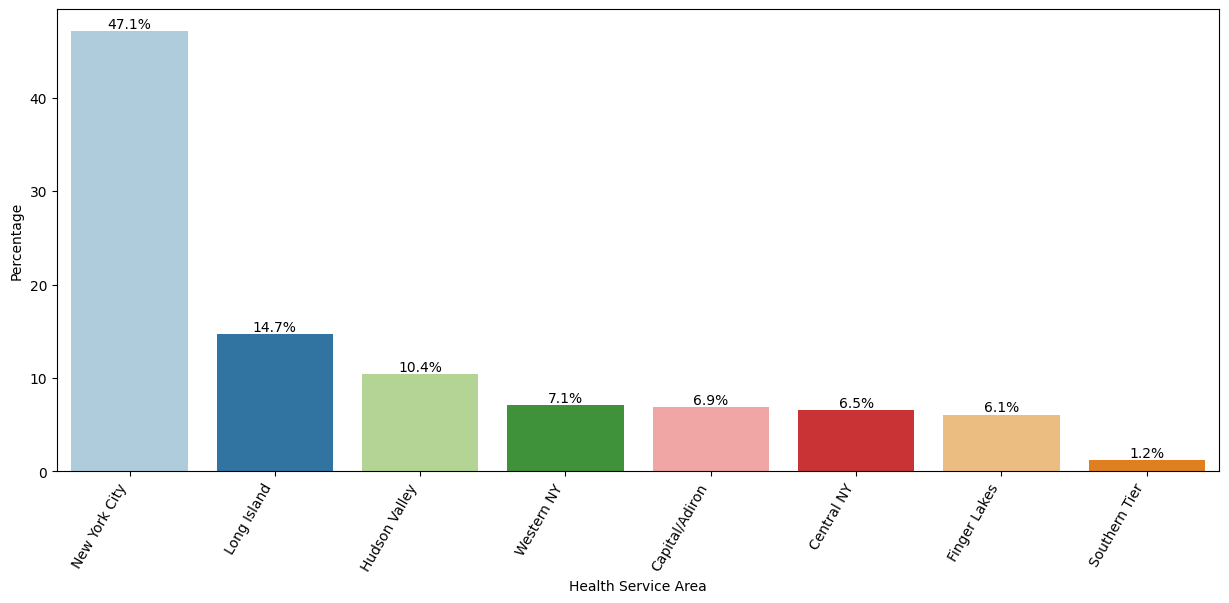

In [76]:
plot_categorical_with_percentage(data, 'Health Service Area')

### **2. Observation on Hospital County**

In [32]:
# Check unique values and their counts
counts = data['Hospital County'].value_counts()
print(counts)

Manhattan      445288
Kings          298247
Queens         221325
Nassau         215831
Bronx          204328
Suffolk        169431
Westchester    131946
Erie           129617
Monroe         109402
Onondaga        76289
Richmond        63933
Albany          62192
Orange          42955
Oneida          36454
Dutchess        35424
Rockland        34898
Broome          29078
Schenectady     22989
Niagara         21450
Chemung         17366
Warren          17134
Rensselaer      15636
Otsego          14305
Ulster          13933
St Lawrence     13601
Chautauqua      13463
Ontario         13057
Jefferson       12111
Clinton         11589
Saratoga         9931
Steuben          9678
Putnam           8093
Cattaraugus      7686
Montgomery       6995
Oswego           6759
Tompkins         6686
Franklin         6460
Columbia         5991
Sullivan         5788
Cayuga           5605
Madison          5578
Genesee          5235
Cortland         4826
Wayne            4232
Fulton           4112
Wyoming   

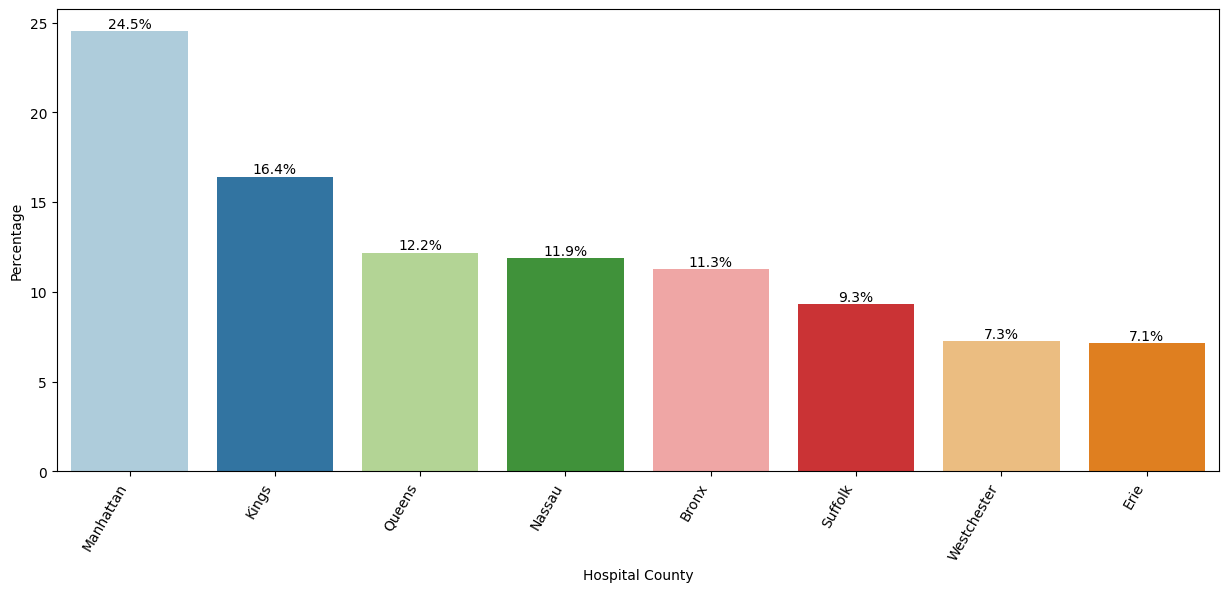

In [77]:
plot_categorical_with_percentage(data, 'Hospital County')

### **3. Observation on Facility Name**

In [34]:
# Check unique values and their counts
counts = data['Facility Name'].value_counts()
print(counts)

Mount Sinai Hospital                                              58696
North Shore University Hospital                                   54232
New York Presbyterian Hospital - Columbia Presbyterian Center     51024
New York Presbyterian Hospital - New York Weill Cornell Center    46720
Montefiore Medical Center - Henry & Lucy Moses Div                45213
                                                                  ...  
Cuba Memorial Hospital Inc                                           48
Albany Medical Center - South Clinical Campus                        37
Ellenville Regional Hospital                                         34
Rockefeller University Hospital                                      22
Monroe Community Hospital                                             4
Name: Facility Name, Length: 225, dtype: int64


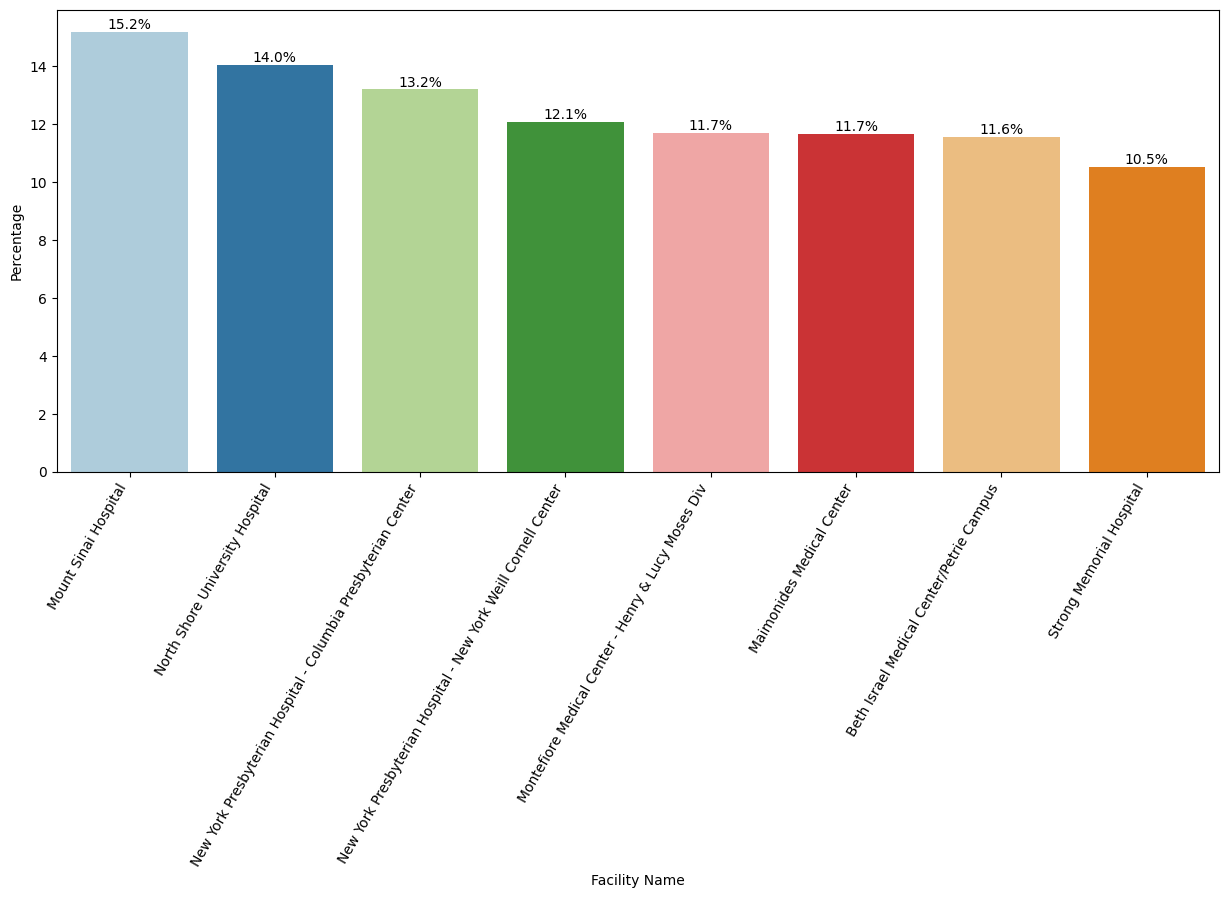

In [79]:
plot_categorical_with_percentage(data, 'Facility Name')

### **4. Observation on Age Group**

In [36]:
# Check unique values and their counts
counts = data['Age Group'].value_counts()
print(counts)

70 or Older    725253
50 to 69       680166
30 to 49       547383
0 to 17        387353
18 to 29       281978
Name: Age Group, dtype: int64


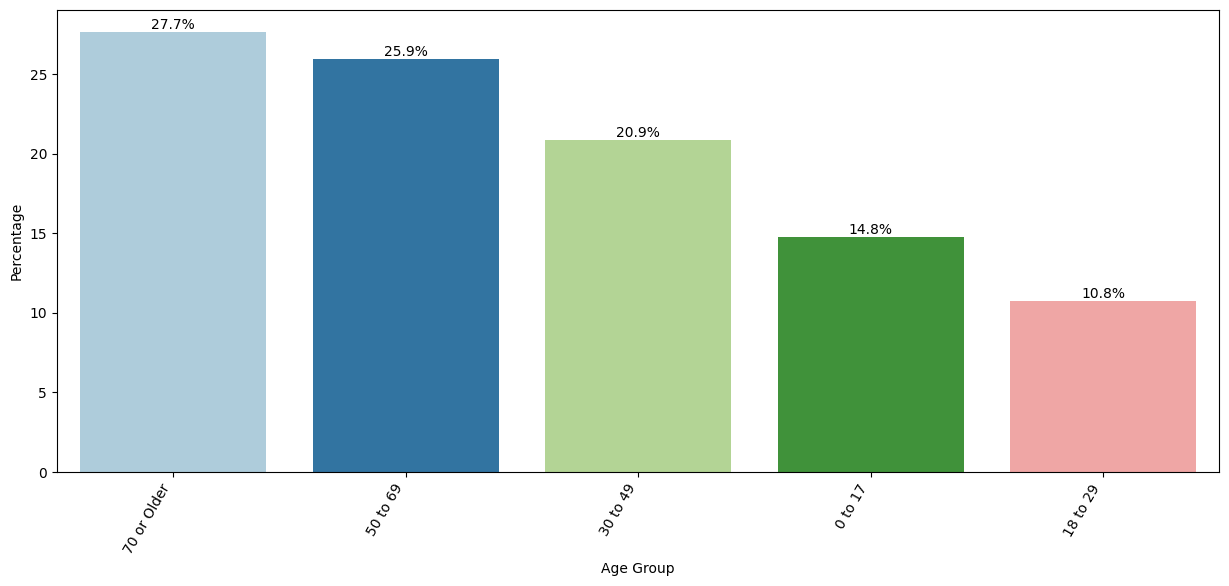

In [80]:
plot_categorical_with_percentage(data, 'Age Group')

### **5. Observation on Zip Code - 3 digits**

In [104]:
# Check unique values and their counts
counts = data['Zip Code - 3 digits'].value_counts()
print(counts)

112      236696
117      174423
104      139139
100      135931
112.0    127703
          ...  
122.0      1881
108.0      1016
116.0       759
106.0       581
118.0        36
Name: Zip Code - 3 digits, Length: 78, dtype: int64


In [105]:
nan_check_column = data['Zip Code - 3 digits'].isna()
any_nan_in_column = nan_check_column.any()
print(any_nan_in_column)

True


In [107]:
data['Zip Code - 3 digits'] = data['Zip Code - 3 digits'].replace('OOS', 0)

# Step 1: Remove non-integer characters
data['Zip Code - 3 digits'] = data['Zip Code - 3 digits'].astype(str).str.replace(r'\.0$', '')

# Step 2: Convert to integer
data['Zip Code - 3 digits'] = data['Zip Code - 3 digits'].replace('nan', 0).astype(int)


<ipython-input-107-519d4c3a31fd>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Zip Code - 3 digits'] = data['Zip Code - 3 digits'].astype(str).str.replace(r'\.0$', '')


In [108]:
counts = data['Zip Code - 3 digits'].value_counts()
print(counts)

112    364399
104    243958
117    202775
100    201780
113    139898
115    102388
114    100316
0       77443
142     72432
105     68557
103     68052
109     63506
146     58500
125     50583
140     49984
130     41157
120     36902
119     36752
107     35558
145     32462
121     32092
144     31461
110     30865
136     29909
132     29814
148     29233
128     27377
134     24769
141     24059
116     23524
111     22940
124     21027
147     20814
131     19492
122     19087
123     19035
133     17915
129     17312
138     15092
137     14896
127     13901
135     12175
126     12109
143     11334
108     10713
106     10185
139      9501
118      9284
149      8458
101      6358
Name: Zip Code - 3 digits, dtype: int64


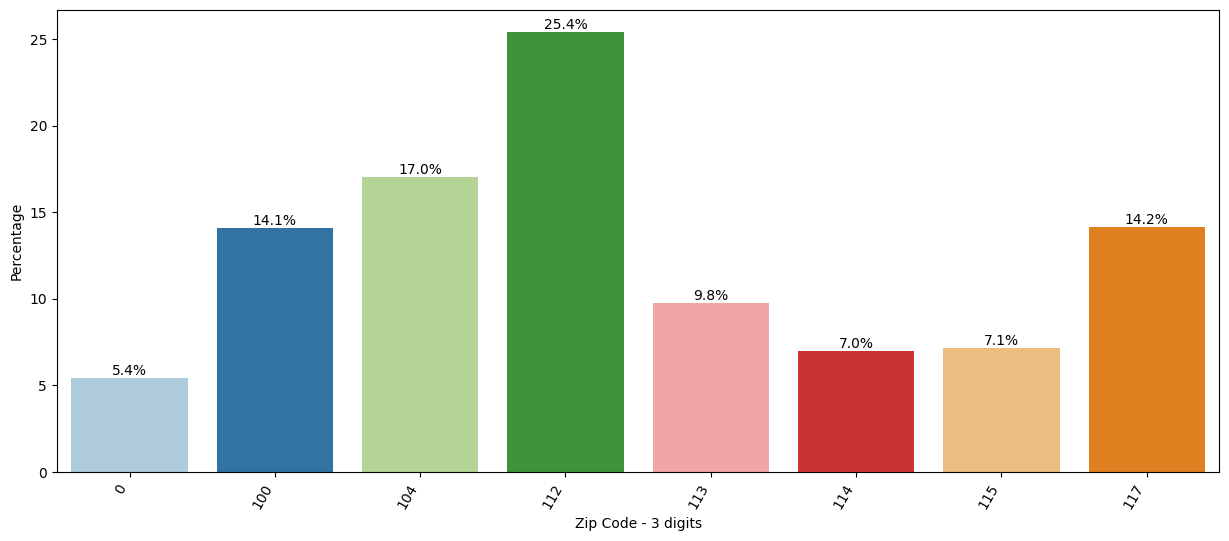

In [109]:
plot_categorical_with_percentage(data, 'Zip Code - 3 digits')

### **6. Observation on Gender**

In [39]:
# Check unique values and their counts
counts = data['Gender'].value_counts()
print(counts)

F    1477671
M    1144399
U         63
Name: Gender, dtype: int64


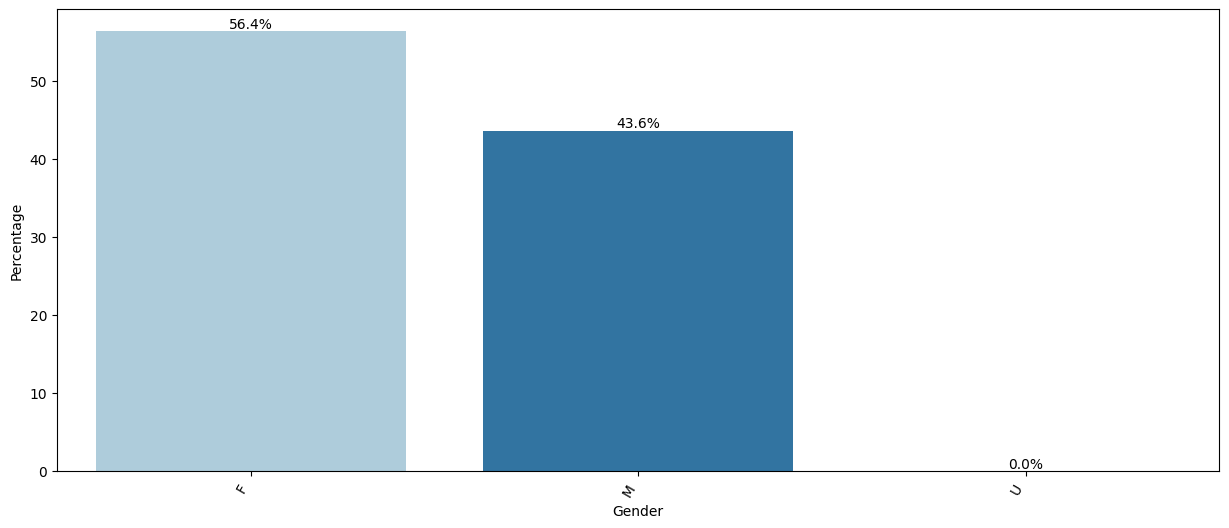

In [110]:
plot_categorical_with_percentage(data, 'Gender')

### **7. Observation on Race**

In [41]:
# Check unique values and their counts
counts = data['Race'].value_counts()
print(counts)

White                     1601378
Black/African American     498561
Other Race                 493854
Unknown                     28340
Name: Race, dtype: int64


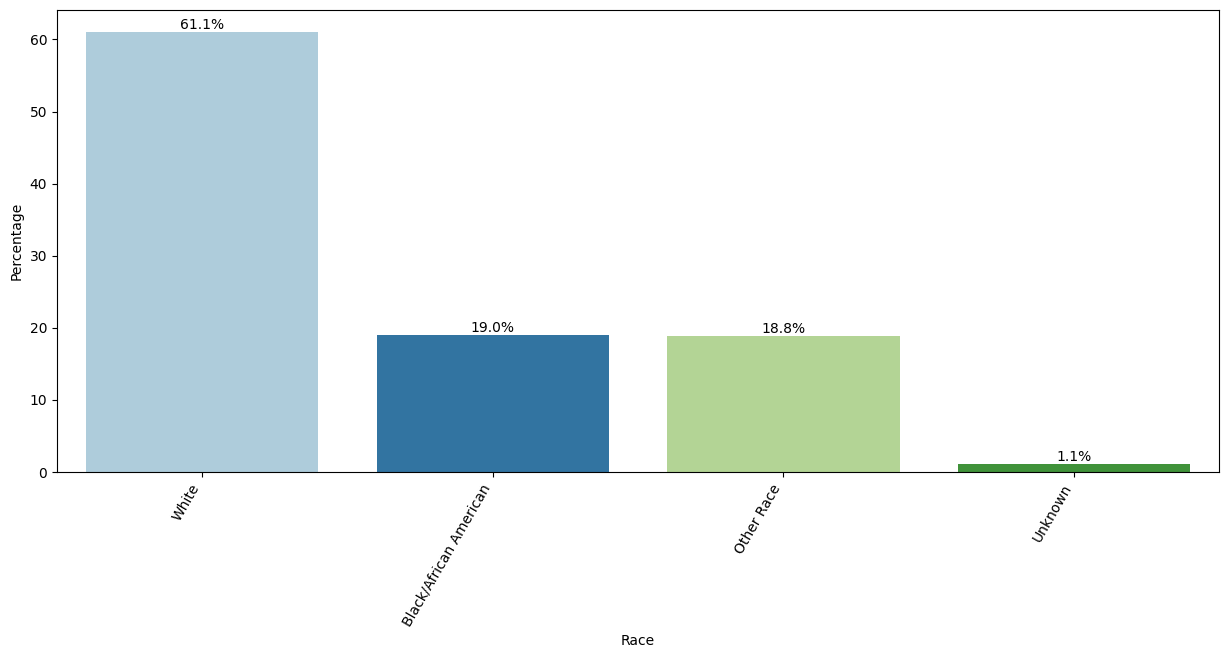

In [111]:
plot_categorical_with_percentage(data, 'Race')

### **8. Observation on Ethnicity**

In [112]:
# Check unique values and their counts
counts = data['Ethnicity'].value_counts()
print(counts)

Not Span/Hispanic    2116780
Spanish/Hispanic      351609
Unknown               153744
Name: Ethnicity, dtype: int64


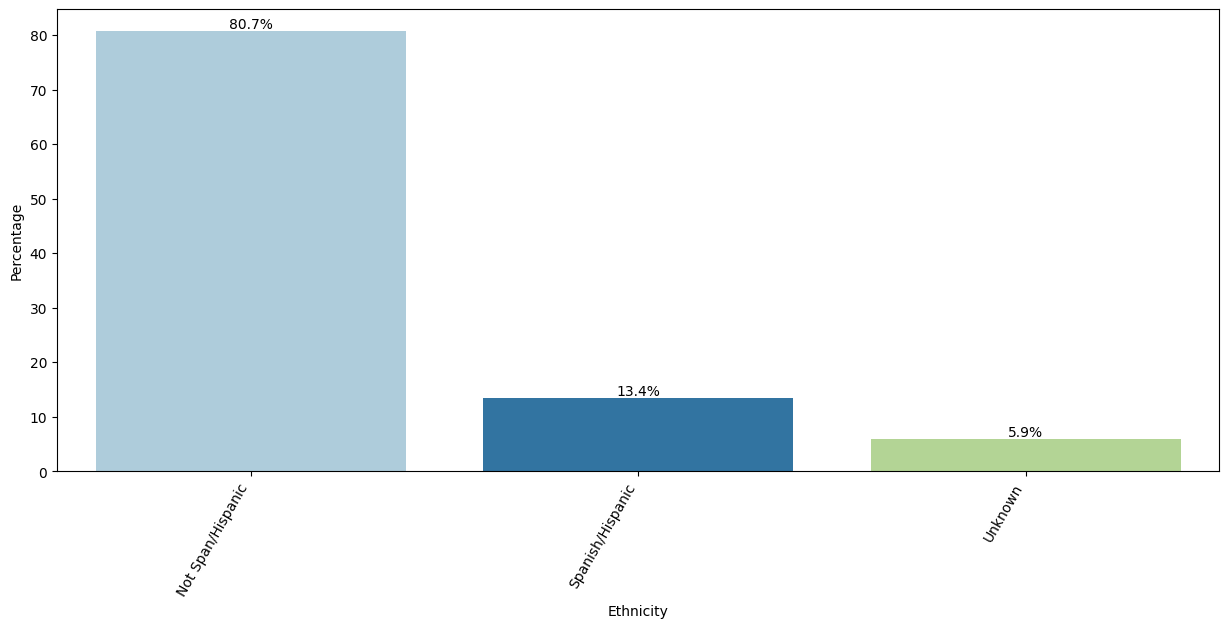

In [113]:
plot_categorical_with_percentage(data, 'Ethnicity')

### **9. Observation on Length of Stay**

In [114]:
# Check unique values and their counts
counts = data['Length of Stay'].value_counts()
print(counts)

2      563044
3      430189
1      412027
4      268852
5      170399
        ...  
76          1
80          1
114         1
82          1
87          1
Name: Length of Stay, Length: 222, dtype: int64


In [119]:
# Step 1: Remove non-numeric characters
data['Length of Stay'] = data['Length of Stay'].str.replace('[^\d]', '', regex=True)

# Step 2: Convert to integer
data['Length of Stay'] = data['Length of Stay'].astype('Int16')

In [120]:
# check the datatype of column
data['Length of Stay'].dtype

Int16Dtype()

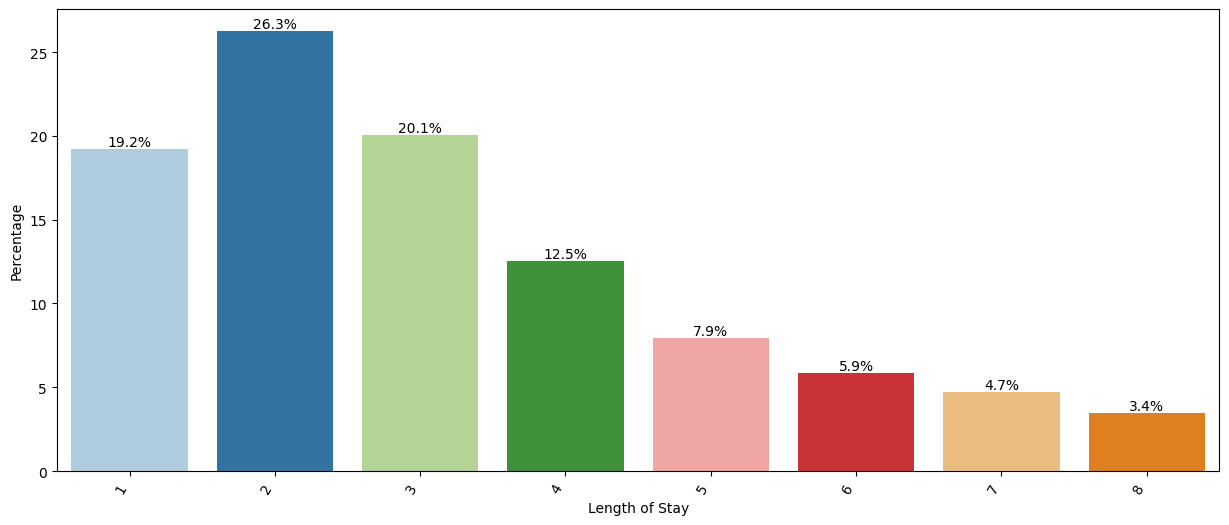

In [121]:
plot_categorical_with_percentage(data, 'Length of Stay')

### **10. Observation on Type of Admission**

In [122]:
# Check unique values and their counts
counts = data['Type of Admission'].value_counts()
print(counts)

Emergency        1628999
Elective          515009
Newborn           241136
Urgent            232051
Not Available       4053
Trauma               885
Name: Type of Admission, dtype: int64


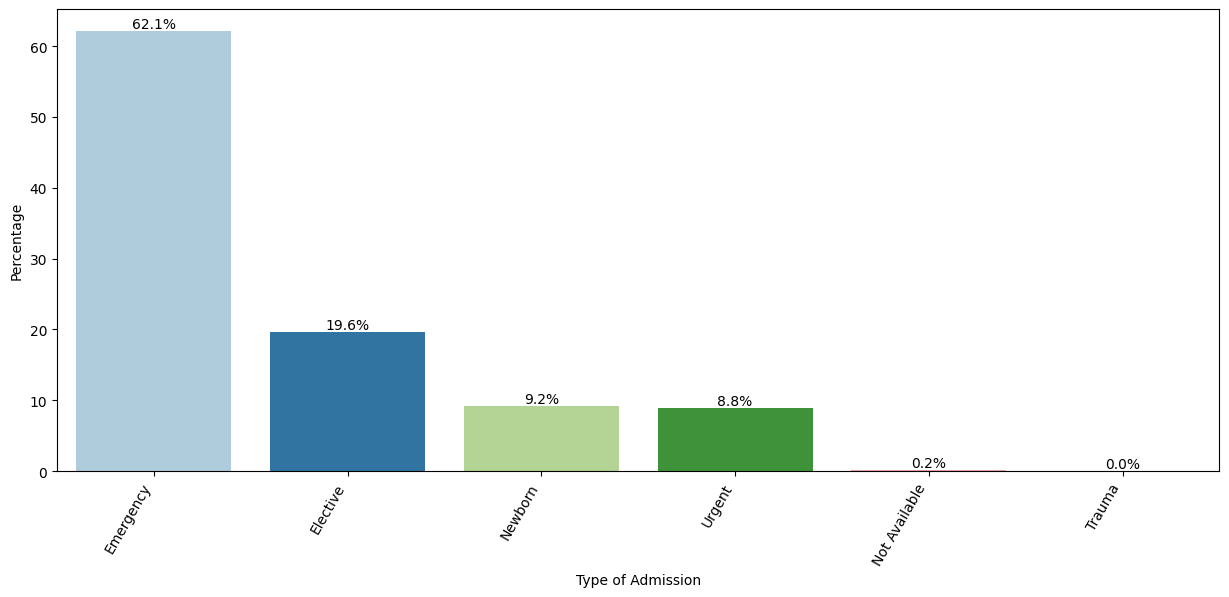

In [123]:
plot_categorical_with_percentage(data, 'Type of Admission')

### **11. Observation on Patient Disposition**

In [124]:
# Check unique values and their counts
counts = data['Patient Disposition'].value_counts()
print(counts)

Home or Self Care                        1786141
Home w/ Home Health Services              321896
Skilled Nursing Home                      246148
Left Against Medical Advice                56948
Expired                                    56160
Short-term Hospital                        47215
Inpatient Rehabilitation Facility          44489
Psychiatric Hospital or Unit of Hosp       15320
Hospice - Medical Facility                  8635
Hospice - Home                              8549
Another Type Not Listed                     8540
Facility w/ Custodial/Supportive Care       7291
Cancer Center or Children's Hospital        5035
Medicare Cert Long Term Care Hospital       3475
Court/Law Enforcement                       3324
Hosp Basd Medicare Approved Swing Bed       2056
Federal Health Care Facility                 718
Medicaid Cert Nursing Facility                46
Critical Access Hospital                      44
Name: Patient Disposition, dtype: int64


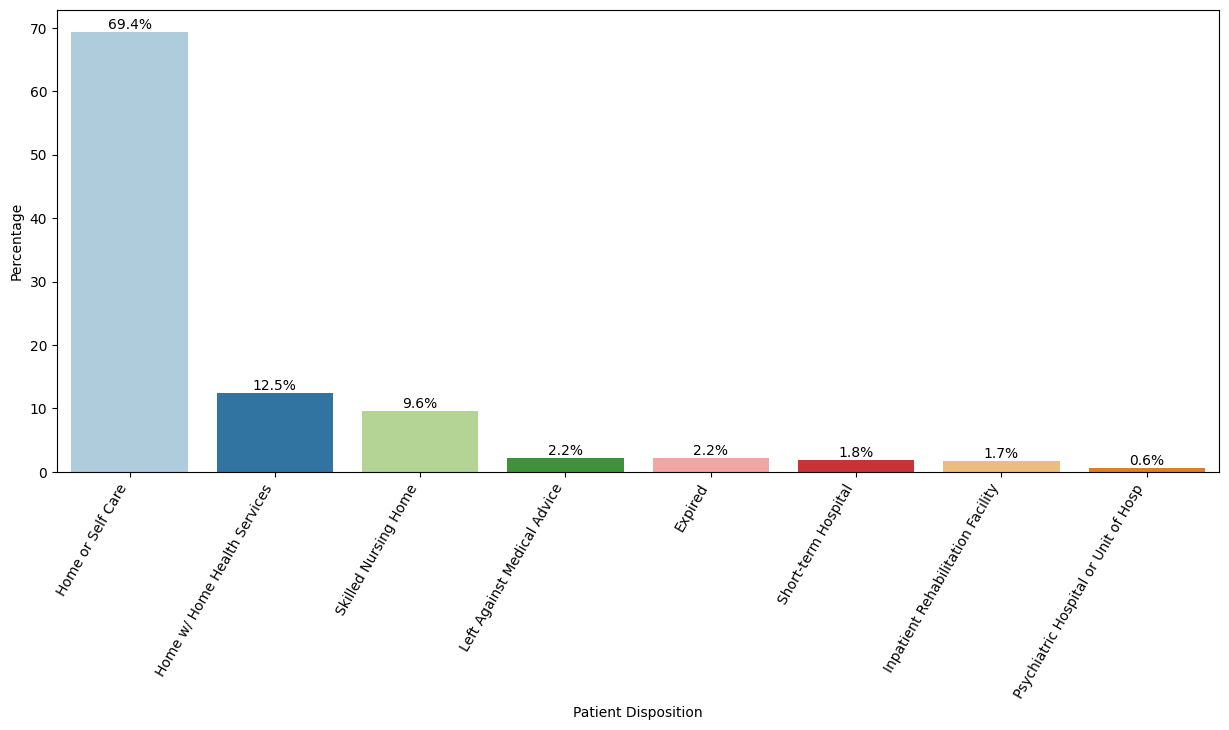

In [125]:
plot_categorical_with_percentage(data, 'Patient Disposition')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       Int16  
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              